In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Targeting Sharpe ratio as a function of # of bets

In [2]:
out = []
p = 0.55

for i in np.arange(1e5):
    rnd = np.random.binomial(n=1, p=p)
    x = (1 if rnd==1 else -1)
    out.append(x)

In [3]:
np.mean(out), np.std(out), np.mean(out) / np.std(out)

(0.09794, 0.9951923213128203, 0.09841313874970542)

# Computing the implied precision

In [4]:
def binHR(sl, pt, n, tSR):
    a = (n + tSR**2) * (pt - sl)**2
    b = (2*n*sl - tSR**2*(pt-sl))*(pt-sl)
    c = n*sl**2
    p = (-b + (b**2 - 4*a*c)**0.5) / (2.*a)
    return p

In [5]:
binHR(-0.025, 0.02, 52, 2)

0.6844497543078034

# Computing the implied betting frequency

In [9]:
def binN(sl, pt, p, tSR):
    freq=(tSR*(pt-sl))**2*p*(1-p)/((pt-sl)*p+sl)**2 # possible extraneous
    if not np.isclose(binHR(sl,pt,freq,tSR), p):return
    return freq

In [10]:
binN(-0.025, 0.02, 0.6, 2)

486.00000000000085

# Calculating the strategy risk in practice

In [11]:
import scipy.stats as ss

In [67]:
def mix_gaussians(mu1, mu2, sigma1, sigma2, prob1, n):
    r1 = np.random.normal(mu1, sigma1, size = int(n * prob1))
    r2 = np.random.normal(mu2, sigma2, size = int(n) - r1.shape[0])
    ret = np.append(r1, r2, axis=0)
    np.random.shuffle(ret)
    return ret

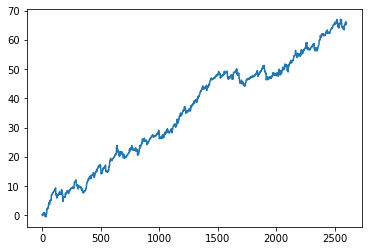

In [80]:
r = mix_gaussians(0.05, -0.1, 0.1, 0.75, 0.85, 2600)

plt.figure()
plt.plot(r.cumsum())
plt.show()

In [81]:
def probFailure(ret, freq, tSR):
    # Derive probability that strategy may fail
    rPos, rNeg = ret[ret>0].mean(), ret[ret<=0].mean()
    p = ret[ret>0].shape[0] / float(ret.shape[0])
    thresP = binHR(rNeg, rPos, freq, tSR)
    risk = ss.norm.cdf(thresP, p, p*(1-p)) # approximation to bootstrap
    return risk

In [82]:
probFailure(r, freq = 260, tSR = 2.0)

0.47936643039537374